In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/crime_data (1).csv')

In [3]:
df.columns

Index(['State', 'VR', 'MR', 'M', 'W', 'H', 'P', 'S'], dtype='object')

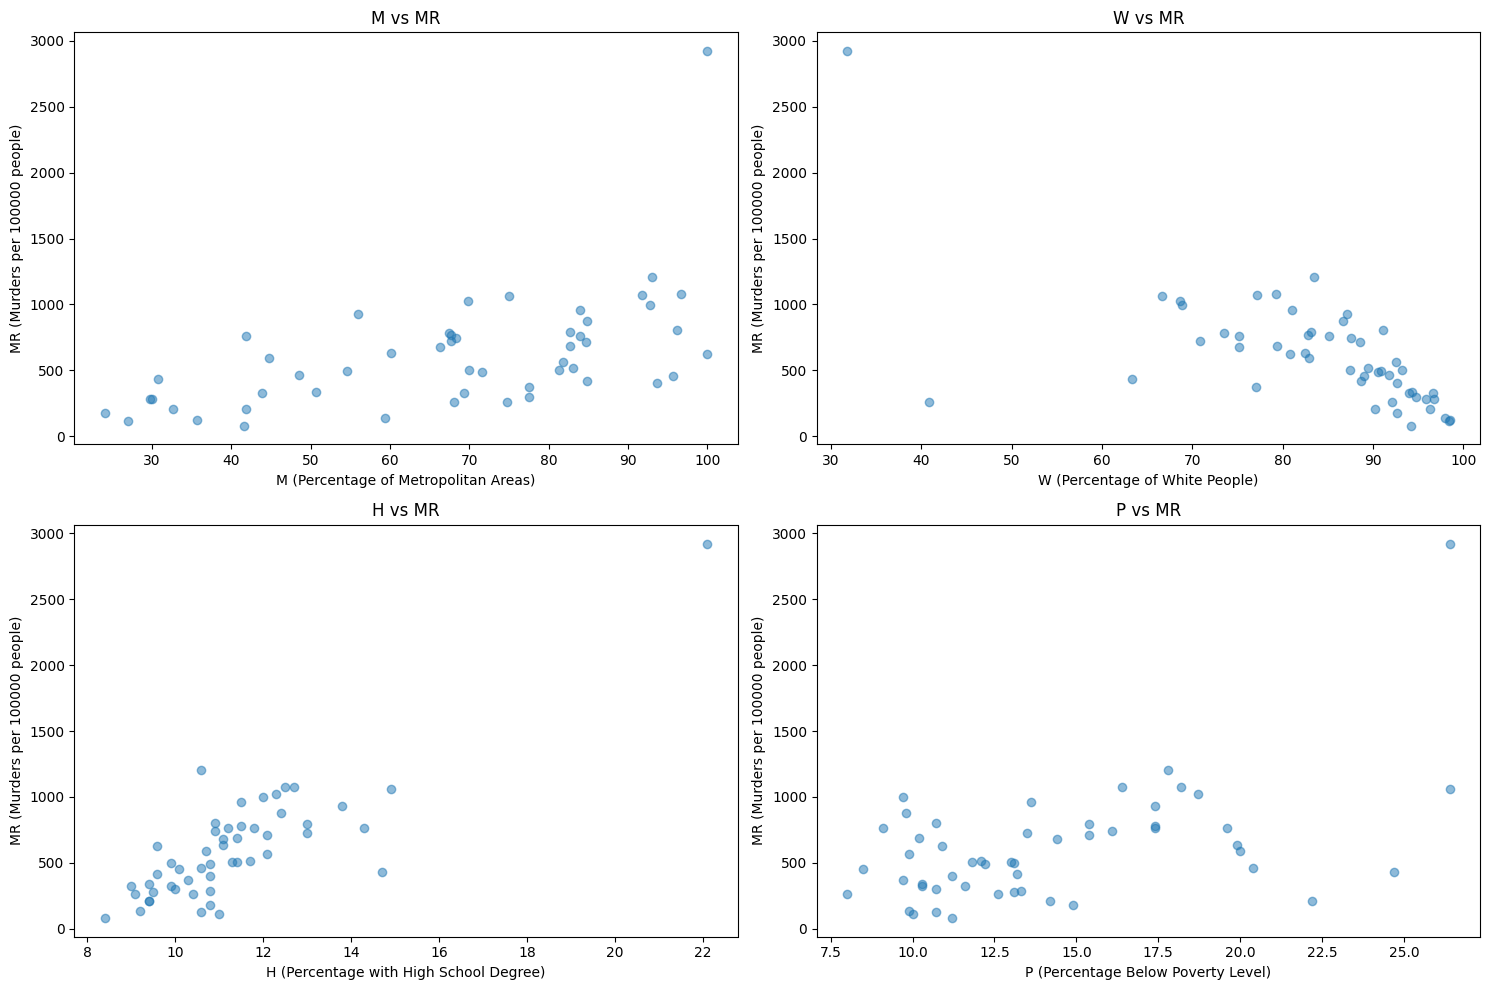

In [9]:
# Assuming the columns are named as follows
# MR = asesinatos por cada 100000 habitantes
# M = porcentaje de áreas metropolitanas
# W = porcentaje de gente blanca
# H = porcentaje de personas con preparatoria terminada
# P = porcentaje con ingresos por debajo del nivel de pobreza

# Assign the variable columns
VR = df['VR']
M = df['M']
W = df['W']
H = df['H']
P = df['P']
S = df['S']

# Plotting each variable against the response variable (MR)
plt.figure(figsize=(15, 10))



# Variable M
plt.subplot(221)
plt.scatter(M, VR, alpha=0.5)
plt.xlabel('M (Percentage of Metropolitan Areas)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('M vs MR')

# Variable W
plt.subplot(222)
plt.scatter(W, VR, alpha=0.5)
plt.xlabel('W (Percentage of White People)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('W vs MR')

# Variable H
plt.subplot(223)
plt.scatter(S, VR, alpha=0.5)
plt.xlabel('H (Percentage with High School Degree)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('H vs MR')

# Variable P
plt.subplot(224)
plt.scatter(P, VR, alpha=0.5)
plt.xlabel('P (Percentage Below Poverty Level)')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('P vs MR')


plt.tight_layout()
plt.show()

In [ ]:
x_variables = ['M', 'W', 'H', 'P']
y_variable = 'MR'

X = df[x_variables].values

# Variable de respuesta y
y = df[y_variable].values

# Agregar una columna de unos a la matriz X para el término independiente
X = np.c_[np.ones(X.shape[0]), X]

# Calcular los coeficientes usando la fórmula de mínimos cuadrados
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Los coeficientes[0] es el término independiente, y los coeficientes restantes son para las variables predictoras
intercept = coefficients[0]
predictor_coefficients = coefficients[1:]

# Imprimir los coeficientes
print("Intercept (Término Independiente):", intercept)
print("Coeficientes de las variables predictoras:", predictor_coefficients)

Intercept (Término Independiente): -39.362375053773235
Coeficientes de las variables predictoras: [ 0.08937732 -0.41776537  0.72531944  1.5371259 ]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
# Matriz de variables predictoras X
X = df[x_variables].values

# Variable de respuesta y
y = df[y_variable].values

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Calcular las predicciones usando validación cruzada de k-pliegues
predictions = cross_val_predict(model, X, y, cv=5)  # Cambia el valor de cv según el número de pliegues deseado

# Calcular métricas de evaluación
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

# Imprimir las métricas
print("Coeficiente de determinación (R2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)

Coeficiente de determinación (R2): 0.125576877538357
Error cuadrático medio (MSE): 98.47241528118663
Error absoluto medio (MAE): 4.978545183148001


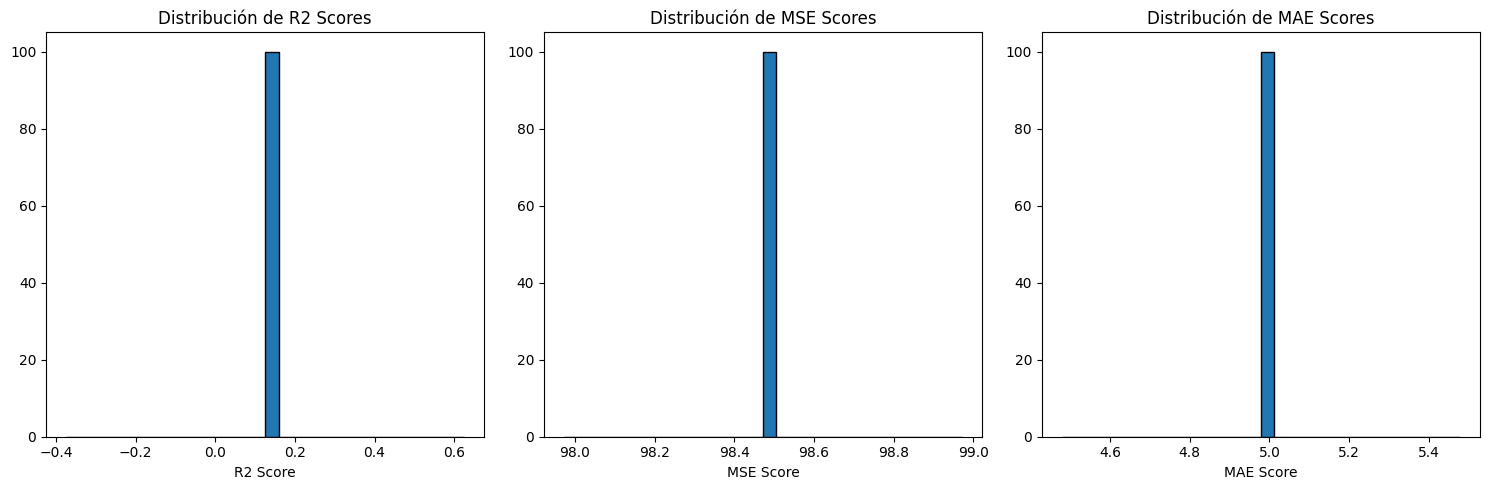

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

x_variables = ['M', 'W', 'H', 'P']
y_variable = 'MR'
X = df[x_variables].values
y = df[y_variable].values

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Configuración para la validación cruzada de Monte Carlo
num_iterations = 100  # Número de iteraciones
cv_iterations = 5     # Número de pliegues en cada iteración

r2_scores = []
mse_scores = []
mae_scores = []

for _ in range(num_iterations):
    # Calcular las predicciones usando validación cruzada de k-pliegues
    predictions = cross_val_predict(model, X, y, cv=cv_iterations)

    # Calcular métricas de evaluación
    r2 = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Histogramas de las métricas de evaluación
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(r2_scores, bins=30, edgecolor='black')
plt.title('Distribución de R2 Scores')
plt.xlabel('R2 Score')

plt.subplot(132)
plt.hist(mse_scores, bins=30, edgecolor='black')
plt.title('Distribución de MSE Scores')
plt.xlabel('MSE Score')

plt.subplot(133)
plt.hist(mae_scores, bins=30, edgecolor='black')
plt.title('Distribución de MAE Scores')
plt.xlabel('MAE Score')

plt.tight_layout()
plt.show()

En este caso nose porque me esta saliendo una barra por gráfica. Pudiera ser que los datos están muy concentrados o que tienen poca variabilidad en las métricas que estás evaluando (R2, MSE y MAE).

Creamos variables cuadradas

In [ ]:
import pandas as pd
import numpy as np

# Definir las variables originales
x_variables = ['M', 'W', 'H', 'P']

# Extraer las variables predictoras y la variable de respuesta
X = df[x_variables].values
y = df['MR'].values

# Agregar las variables al cuadrado
X_squared = X ** 2

# Extender la lista de nombres x_variables con los nombres de las variables al cuadrado
x_squared_variable_names = [variable + '_squared' for variable in x_variables]
x_variables.extend(x_squared_variable_names)

# Combinar X y X_squared
X = np.column_stack((X, X_squared))

# Comparar 'M' con 'M_squared'
comparison_df = pd.DataFrame({'M': X[:, x_variables.index('M')], 'M_squared': X[:, x_variables.index('M_squared')]})

print(comparison_df.head())


      M  M_squared
0  41.8    1747.24
1  67.4    4542.76
2  44.7    1998.09
3  84.7    7174.09
4  96.7    9350.89


Creamos los productos entre pares de variables

In [ ]:
# Agregar interacciones solo entre las variables originales
new_variable_names = []

num_predictors = X.shape[1]
num_original_variables = len(x_variables)

for i in range(num_original_variables):
    for j in range(i + 1, num_original_variables):
        # Verificar que ambas variables involucradas en la interacción sean originales
        if (x_variables[i] in x_variables[:4]) and (x_variables[j] in x_variables[:4]):
            interaction_term = X[:, i] * X[:, j]
            interaction_term_name = x_variables[i] + 'x' + x_variables[j]
            X = np.column_stack((X, interaction_term))
            new_variable_names.append(interaction_term_name)

# Extender x_variables con las variables al cuadrado
x_variables.extend(new_variable_names)

In [ ]:
x_variables

['M',
 'W',
 'H',
 'P',
 'M_squared',
 'W_squared',
 'H_squared',
 'P_squared',
 'MxW',
 'MxH',
 'MxP',
 'WxH',
 'WxP',
 'HxP']

comprobamos que si estan correctamente las variables calculadas y guardadas en el lugar correcto

In [ ]:
# Crear un DataFrame con las variables originales
variables_originales = df[['M', 'W', 'H', 'P']]

# Crear un DataFrame con las variables de interacción calculadas previamente en X
variables_interaccion_calculadas = pd.DataFrame(X[:, -len(new_variable_names):], columns=new_variable_names)

# Calcular manualmente las variables de interacción esperadas
variables_interaccion_manual = pd.DataFrame({
    'MxW_calculada': variables_originales['M'] * variables_originales['W'],
    'MxH_calculada': variables_originales['M'] * variables_originales['H'],
    'MxP_calculada': variables_originales['M'] * variables_originales['P'],
    'WxH_calculada': variables_originales['W'] * variables_originales['H'],
    'WxP_calculada': variables_originales['W'] * variables_originales['P'],
    'HxP_calculada': variables_originales['H'] * variables_originales['P']
})

# Mostrar la tabla de comparación
comparison_table = pd.concat([variables_interaccion_manual, variables_interaccion_calculadas], axis=1)
comparison_table.head()

,MxW_calculada,MxH_calculada,MxP_calculada,WxH_calculada,WxP_calculada,HxP_calculada,MxW,MxH,MxP,WxH,WxP,HxP
0,3143.36,3619.88,380.38,6512.32,684.32,788.06,3143.36,3619.88,380.38,6512.32,684.32,788.06
1,4953.90,4509.06,1172.76,4917.15,1278.90,1164.06,4953.90,4509.06,1172.76,4917.15,1278.90,1164.06
2,3705.63,2963.61,894.00,5496.27,1658.00,1326.00,3705.63,2963.61,894.00,5496.27,1658.00,1326.00
3,7504.42,6665.89,1304.38,6972.82,1364.44,1211.98,7504.42,6665.89,1304.38,6972.82,1364.44,1211.98
4,7668.31,7368.54,1759.94,6042.66,1443.26,1386.84,7668.31,7368.54,1759.94,6042.66,1443.26,1386.84


In [ ]:
x_variables

['M',
 'W',
 'H',
 'P',
 'M_squared',
 'W_squared',
 'H_squared',
 'P_squared',
 'MxW',
 'MxH',
 'MxP',
 'WxH',
 'WxP',
 'HxP']

In [ ]:
# Asegurarnos que estamosusando el indice correcto
data = {}
data['M'] = X[:, x_variables.index('M')]  # Variable 'M'
index_M = x_variables.index('M')
data['M_squared'] = X[:, index_M + 4]  # Variable 'M_squared'

# Crear un DataFrame para comparar 'M' con 'M_squared'
df_comparison = pd.DataFrame(data)

# Imprimir las primeras filas del DataFrame
print(df_comparison.head())

      M  M_squared
0  41.8    1747.24
1  67.4    4542.76
2  44.7    1998.09
3  84.7    7174.09
4  96.7    9350.89


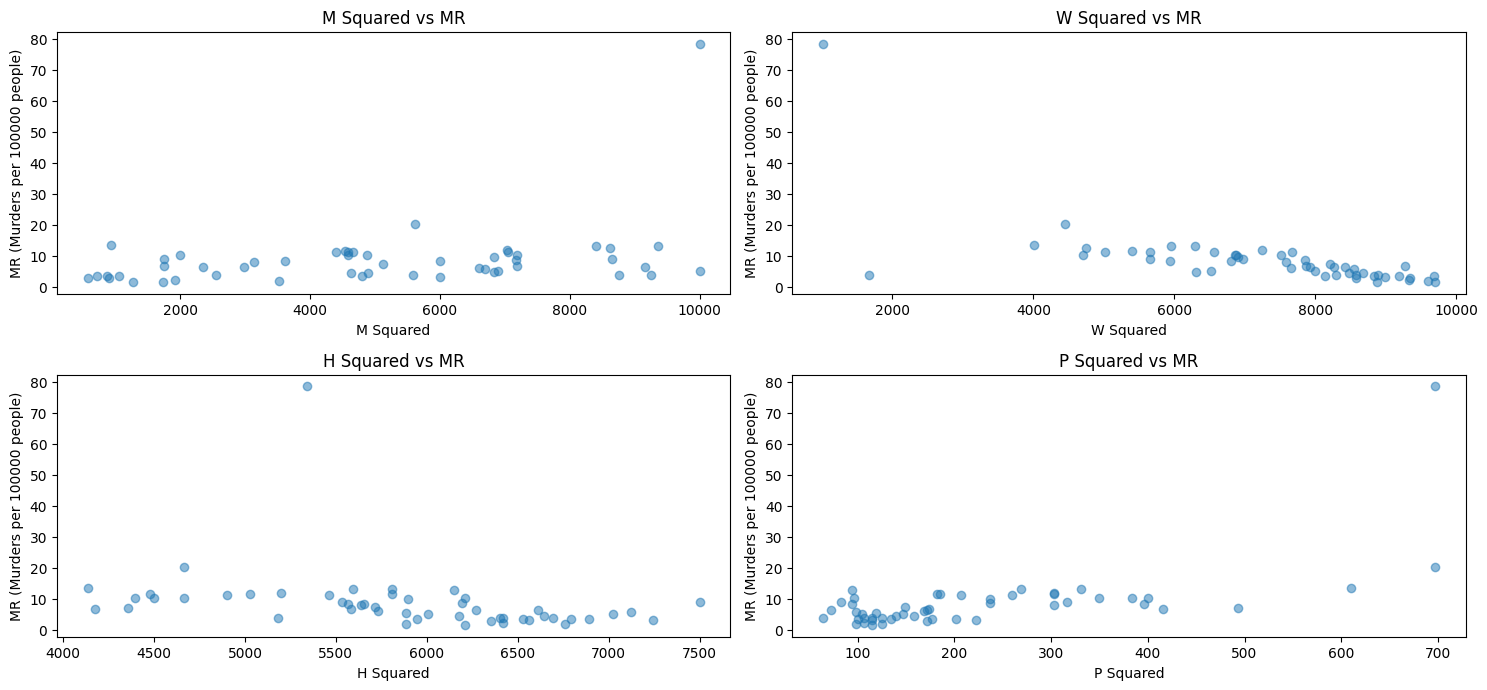

In [ ]:
# encontrar el index de cada variable
index_M = x_variables.index('M')
index_W = x_variables.index('W')
index_H = x_variables.index('H')
index_P = x_variables.index('P')

# acceder las columnas correspondientes con el index
X_M_squared = X[:, index_M + 4]
X_W_squared = X[:, index_W + 4]
X_H_squared = X[:, index_H + 4]
X_P_squared = X[:, index_P + 4]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(321)
plt.scatter(X_M_squared, MR, alpha=0.5)
plt.xlabel('M Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('M Squared vs MR')

plt.subplot(322)
plt.scatter(X_W_squared, MR, alpha=0.5)
plt.xlabel('W Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('W Squared vs MR')

plt.subplot(323)
plt.scatter(X_H_squared, MR, alpha=0.5)
plt.xlabel('H Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('H Squared vs MR')

plt.subplot(324)
plt.scatter(X_P_squared, MR, alpha=0.5)
plt.xlabel('P Squared')
plt.ylabel('MR (Murders per 100000 people)')
plt.title('P Squared vs MR')

plt.tight_layout()
plt.show()

In [ ]:
X

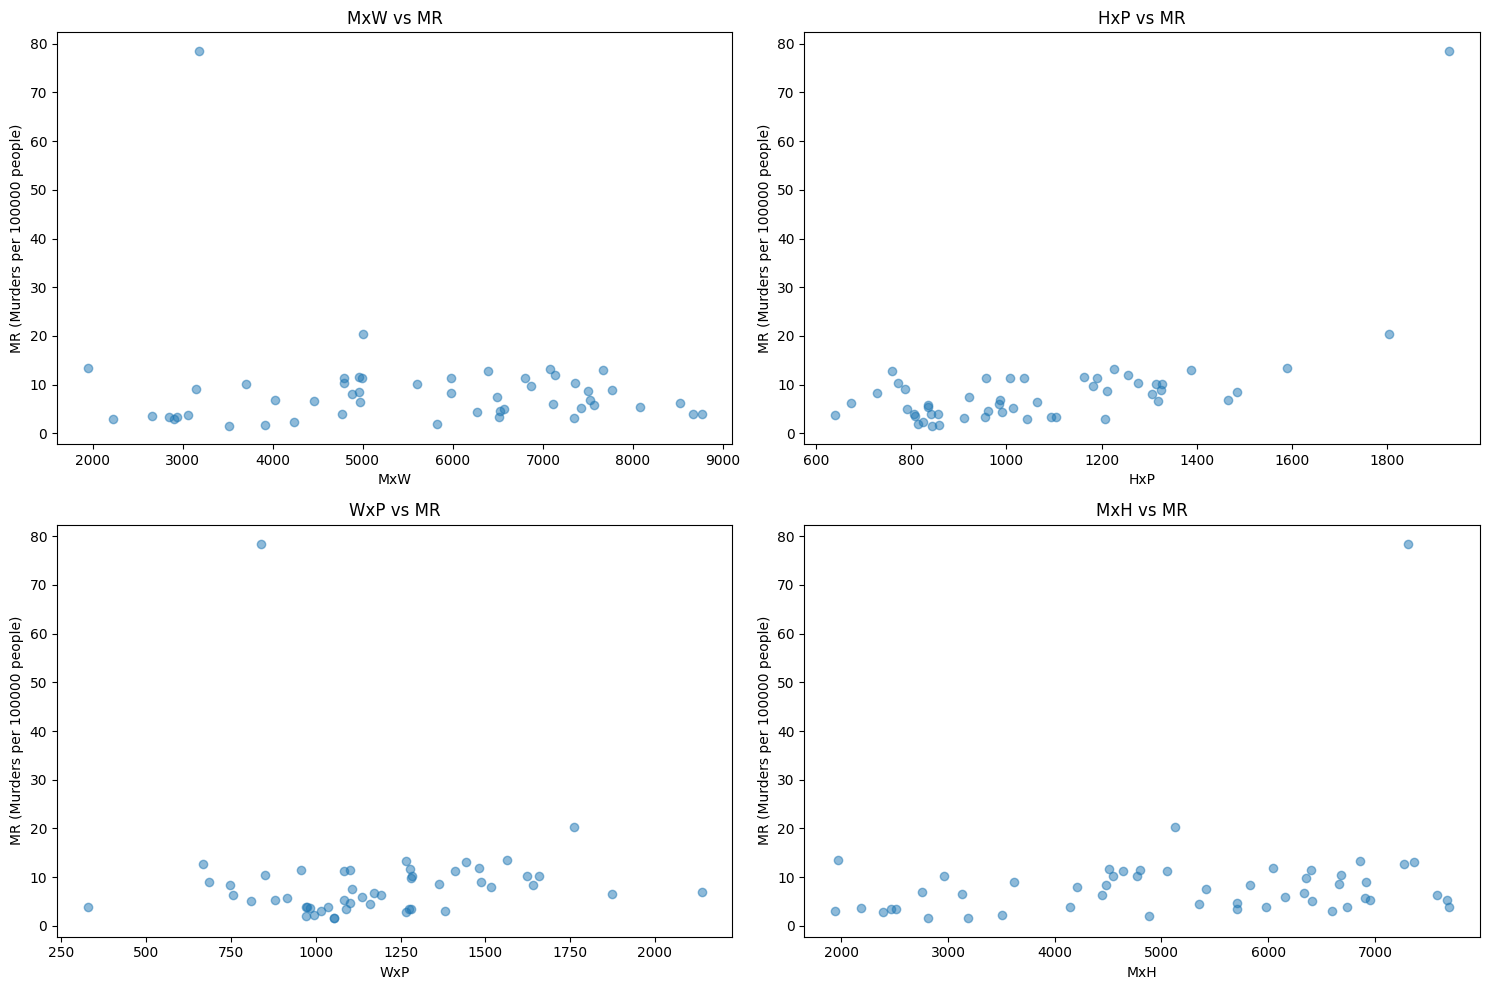

In [ ]:
# Crear scatter plots pare algunas variables de producto entre pares de variables
selected_interaction_terms = ['MxW', 'HxP', 'WxP', 'MxH']

plt.figure(figsize=(15, 10))

for term_name in selected_interaction_terms:
    # Verificar si el término de interacción está en x_variables
    if term_name in x_variables:
        term_index = x_variables.index(term_name)
        term_values = X[:, term_index]

        plt.subplot(2, 2, selected_interaction_terms.index(term_name) + 1)
        plt.scatter(term_values, MR, alpha=0.5)
        plt.xlabel(f'{term_name}')
        plt.ylabel('MR (Murders per 100000 people)')
        plt.title(f'{term_name} vs MR')

plt.tight_layout()
plt.show()

In [ ]:
x_variables

['M',
 'W',
 'H',
 'P',
 'M_squared',
 'W_squared',
 'H_squared',
 'P_squared',
 'MxW',
 'MxH',
 'MxP',
 'WxH',
 'WxP',
 'HxP']

In [ ]:
# Eliminar las columnas 'State' y 'VR'
df = df.drop(['State', 'VR', 'S'], axis=1)

# Crear un DataFrame con las columnas adecuadas
column_names = ['M_squared', 'W_squared', 'H_squared', 'P_squared',
                'MxW', 'MxH', 'MxP', 'WxH', 'WxP', 'HxP']

# Tomar solo las primeras 10 columnas de X que coinciden con las especificadas en column_names
X_df = pd.DataFrame(X[:, :10], columns=column_names)

# Concatenar las columnas de X_df a df
df = pd.concat([df, X_df], axis=1)
df.columns

Index(['MR', 'M', 'W', 'H', 'P', 'M_squared', 'W_squared', 'H_squared',
       'P_squared', 'MxW', 'MxH', 'MxP', 'WxH', 'WxP', 'HxP'],
      dtype='object')

In [ ]:
# Obtener las variables predictoras (X) y la variable de respuesta (y)
X = df.iloc[:, 1:5].values   # Excluir la primera columna (MR) como variable de respuesta
y = df['MR'].values

from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables predictoras
X_scaled = scaler.fit_transform(X)

# Agregar una columna de unos a la matriz X para el término independiente
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]  # Usar X_scaled en lugar de X

# Calcular los coeficientes usando la fórmula de mínimos cuadrados
coefficients = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y  # Usar X_scaled en lugar de X

# Los coeficientes[0] es el término independiente, y los coeficientes restantes son para las variables predictoras
intercept = coefficients[0]
predictor_coefficients = coefficients[1:]

# Imprimir los coeficientes
print("Intercept (Término Independiente):", intercept)
print("Coeficientes de las variables predictoras:", predictor_coefficients)

# Crear el modelo de regresión lineal
def linear_regression_model(X, coefficients, intercept):
    return X.dot(coefficients) + intercept

# Obtener el modelo
modelo = linear_regression_model(X_scaled, coefficients, intercept)  # Usar X_scaled en lugar de X


Intercept (Término Independiente): 8.727450980392154
Coeficientes de las variables predictoras: [ 1.9431346  -5.48200634  4.01608726  6.97713052]


aqui no pude hacer el modelo con mas de 5 variables independientes porque usando mas de 5 la matriz es singular, osea que no tiene inversa. Podemos estandarizar datos, (que ya se hizo), eliminar variables o simplemente hacer un modelo diferente. En este caso vamos a intentar hacer otro modelo. (modelo de regresión de Ridge)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = df.drop(columns=['MR']).values
y = df['MR'].values

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión de Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario

# Ajustar el modelo a los datos de entrenamiento
ridge.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = ridge.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficientes:", ridge.coef_)
print("Intercepto:", ridge.intercept_)
print("R^2:", r2)
print("MSE:", mse)
print("MAE:", mae)

Coeficientes: [ 2.9450004  -2.32268057  1.09687412  0.1318043   2.9450004  -2.32268057
  1.09687412  0.1318043   4.06426475  4.23207869  0.64041504  7.47062027
 -7.99515045  0.38570306]
Intercepto: 9.300889341113354
R^2: -0.27444371511196697
MSE: 32.90403020565361
MAE: 4.153904809150356


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Especifica el número de pliegues (k)
k = 5

# Inicializa las listas para almacenar las métricas
r2_scores = []
mse_scores = []
mae_scores = []

# Crea un objeto KFold para dividir los datos en k pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Itera a través de los pliegues
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inicializa y ajusta el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula las métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Agrega las métricas a las listas
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Calcula el promedio de las métricas de evaluación
avg_r2 = sum(r2_scores) / k
avg_mse = sum(mse_scores) / k
avg_mae = sum(mae_scores) / k

# Imprime las métricas promedio
print(f"R^2 promedio: {avg_r2}")
print(f"MSE promedio: {avg_mse}")
print(f"MAE promedio: {avg_mae}")

R^2 promedio: -0.5151943788569688
MSE promedio: 75.38531625314504
MAE promedio: 4.548306170565374


El R^2 promedio es aproximadamente -0.515, lo que sugiere que el modelo de regresión lineal no se ajusta bien a los datos.

El MSE promedio es 75.385, lo que indica que el modelo tiene un error cuadrático medio relativamente alto en la predicción de la variable de respuesta.

El MAE promedio es aproximadamente 4.548, lo que representa el error absoluto medio en las predicciones del modelo.

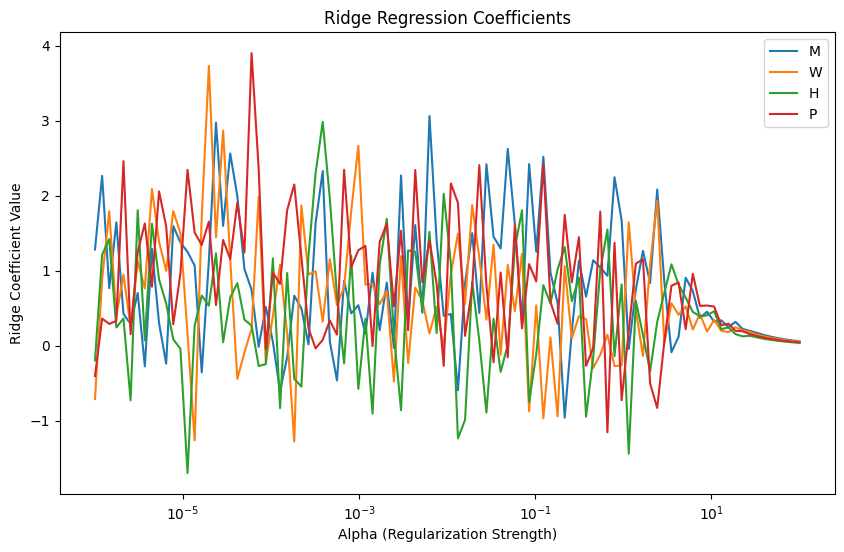

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


x_variables = ['M', 'W', 'H', 'P']
y_variable = 'MR'

# NUMPY ARRAYS
X = df[x_variables].values
y = df[y_variable].values

# NORMALIZAR DATOS
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# AGREGAR COLUMNA
X = np.column_stack((np.ones(X.shape[0]), X))

# Ridge regression parameters
alpha = 0.1  # Regularization parameter

# Define gradient descent function
def gradient_descent(X, y, alpha, num_epochs, learning_rate):
    num_samples, num_features = X.shape
    theta = np.random.randn(num_features)  # Initialize coefficients with random values

    for epoch in range(num_epochs):
        residuals = y - X.dot(theta)
        gradient = -2 * X.T.dot(residuals) / num_samples + 2 * alpha * theta
        theta -= learning_rate * gradient

    return theta

# Perform gradient descent
num_epochs = 100
learning_rate = 0.001
theta_ridge = gradient_descent(X, y, alpha, num_epochs, learning_rate)

#  Ridge plot
ridge_values = []
alphas = np.logspace(-6, 2, 100)  # Range of alpha values
for alpha in alphas:
    theta = gradient_descent(X, y, alpha, num_epochs, learning_rate)
    ridge_values.append(theta)

#  ridge values to a numpy array for plotting
ridge_values = np.array(ridge_values)

# Plot Ridge coefficients for each predictor
plt.figure(figsize=(10, 6))
for i, predictor in enumerate(x_variables):
    plt.plot(alphas, ridge_values[:, i+1], label=predictor)

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Ridge Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.legend()
plt.show()


nota importante: es necesario normalizar los datos de lo contrario los cálculos  resultan en valores numéricos demasiado grandes para ser representados con precisión.

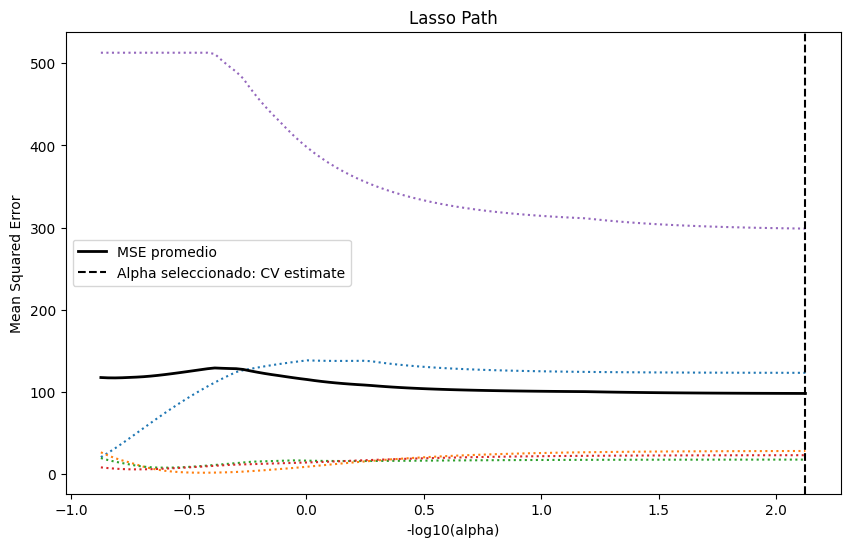

Relevant Variables: ['M', 'W', 'H', 'P']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

#vairbales originales
x_variables = ['M', 'W', 'H', 'P']
y_variable = 'MR'

# numpy arrays para  (X) y (y)
X = df[x_variables].values
y = df[y_variable].values

# estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit Lasso model con validacion cruzada
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# lasso plot
plt.figure(figsize=(10, 6))
plt.plot(-np.log10(lasso.alphas_), lasso.mse_path_, ':')
plt.plot(-np.log10(lasso.alphas_), lasso.mse_path_.mean(axis=-1), 'k',
         label='MSE promedio', linewidth=2)
plt.axvline(-np.log10(lasso.alpha_), linestyle='--', color='k',
            label='Alpha seleccionado: CV estimate')
plt.legend()

plt.xlabel('-log10(alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

# obtener e imprimir variables relevantes
relevant_variables = [x_var for x_var, coef in zip(x_variables, lasso.coef_) if coef != 0]
print("Relevant Variables:", relevant_variables)

Quiero empezar mi conclusión diciendo que quise hacer todo este ejercicio de 0 sin ver el codigo de ejemplo para ver si lo podía resolver yo sin copiar codigo y asi entenderlo mejor. Al principio pense que lo estaba haciendo mal por los valores de R^2, MSE y MAE, pero si analizamos las graficas de cada variable predictora vs la variable de respuesta podemos ver que no existe una gran correlacion entre las variables. La variable de respuesta no aumenta o cambia de manera apreciable conforme aumenta la variable predictora, esto sugiere que no hay una correlación lineal evidente entre las variables predictoras y la variable de respuesta. Esto es importante de tomar en cuenta.

Calculando R2, MSE y MAE, podemos ver que en resumen,  el modelo de regresión lineal no es muy efectivo para explicar la variabilidad en los asesinatos ("MR"). El bajo valor de R2 y los errores MSE y MAE relativamente altos indican que el modelo no está capturando adecuadamente las relaciones entre las variables predictoras y la variable de respuesta. Puede ser necesario explorar modelos más complejos o considerar la posibilidad de que las relaciones subyacentes sean no lineales.

Lo mismo pasa cuando le agregamos al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Los valores R2, MSE y MAE son similares

La regresión Ridge y Lasso son técnicas de regularización que ayudan a manejar problemas como la multicolinealidad y reducir la varianza del modelo, pero su capacidad para mejorar el rendimiento del modelo depende de la existencia de relaciones lineales entre las variables predictoras y la variable de respuesta. Si no hay una correlación lineal evidente entre estas variables, es menos probable que Ridge o Lasso proporcionen mejoras significativas. Es por eso que tampoco vimos much mejoría en estos modelos.


dicho todo esto, mi conclusión es que hubira sido mejor para los datos de criminalidad, el modelo cuadrático, dado que  no se observa una relación lineal evidente entre las variables predictoras y la variable de respuesta en tus datos. De acuerdo a lo que nos pedía el ejercicio, se realizaron transformaciones cuadráticas en el paso 5 al agregar columnas con los cuadrados de las variables predictoras, pero esto no implica  que se haya ajustado un modelo cuadrático completo. Un modelo cuadrático completo incluiría términos cuadráticos en todas las variables predictoras en la ecuación de regresión.
